LFP
<class 'h5py._hl.dataset.Dataset'>
<HDF5 dataset "LFP": shape (4, 1455948), type "<f8">
label
<class 'h5py._hl.dataset.Dataset'>
<HDF5 dataset "label": shape (1455948,), type "|b1">
torch.Size([97953, 1])


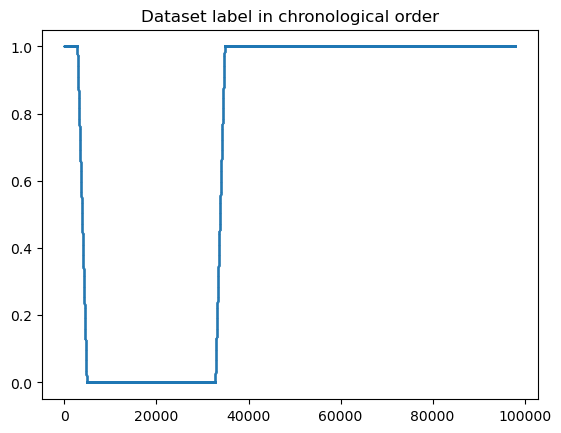

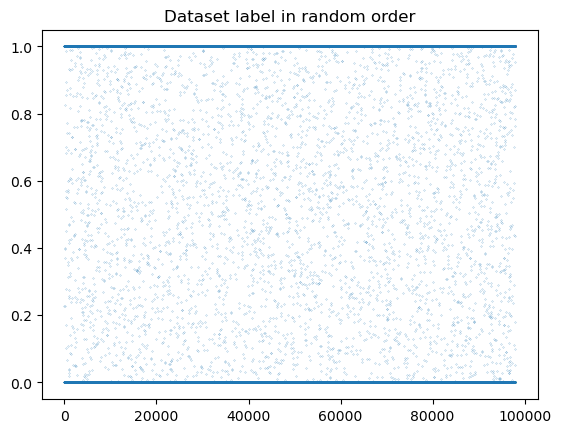

In [20]:
import h5py
from pathlib import Path
import torch
import matplotlib.pyplot as plt


def read_hdf5_data(file_path=None):
    if file_path is None: 
        file_path = Path("../src/movement_disorder_dl/data/essential_tremor/ET1/Pegboard_off.h5")

    with h5py.File(file_path, "r") as file:
        def print_name(name):
            print(name)

        def print_name_object(name, obj):
            print(name, type(obj), obj, sep="\n")

        file.visititems(print_name_object)

        lfp = torch.tensor(file["LFP"][:])
        label = torch.tensor(file["label"][:])

    return lfp, label

def plot_labels_chronological_and_permuted(lfp = None, label = None):
    if (lfp is None) & (label is None):
        lfp, label = read_hdf5_data()
    # Unfold the label data
    temp = lfp[0, :10000]
    temp_y = label[:100000]

    unfolded_y = (
        temp_y.unfold(0, 2048, 1)
        .to(torch.float16)
        .mean(dim=1, keepdim=True)
    )
    print(unfolded_y.shape)

    # Plot
    plt.plot(unfolded_y, ".", markersize=.3)
    plt.title("Dataset label in chronological order")
    plt.show()

    # Plot with random ordering
    idx_perm = torch.randperm(unfolded_y.shape[0])
    plt.plot(unfolded_y[idx_perm], ".", markersize=.3)
    plt.title("Dataset label in random order")
    plt.show()

### MAIN ###
plot_labels_chronological_and_permuted()

In [21]:
# Folding returns a view of the original data
#
# Below shows that using the unfold method, the returned data is a view as it
# has the same data pointer identifier thus indicating that they are pointing 
# to the same data in memory.

import torch

def show_view_and_data_pointer_example():
    temp = torch.rand(500)

    pre_unfold = temp
    print(f"Data pointer address before unfold: \t {pre_unfold.data_ptr()}")

    post_unfold = temp.unfold(0, 5, 1)
    print(f"Data pointer address after unfold: \t {post_unfold.data_ptr()}")


### MAIN ###
show_view_and_data_pointer_example()

Data pointer address before unfold: 	 5803060224
Data pointer address after unfold: 	 5803060224


In [1]:
import lightning as L
from movement_disorder_dl.lfp_data import EssentialTremorLFPDataset_Posture_Lightning
from movement_disorder_dl.model import CNN1d_Lightning


trainer = L.Trainer()
model = CNN1d_Lightning()
dataset = EssentialTremorLFPDataset_Posture_Lightning()

trainer.fit(model=model, datamodule=dataset)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniconda/base/envs/movement_disorder/lib/python3.13/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
Parsing data...: 100%|██████████| 8/8 [00:00<00:00, 12.90it/s]
/opt/homebrew/Caskroom/miniconda/base/envs/movement_disorder/lib/python3.13/site-packages/lightning/pytorch/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
/opt/homeb

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/opt/homebrew/Caskroom/miniconda/base/envs/movement_disorder/lib/python3.13/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/opt/homebrew/Caskroom/miniconda/base/envs/movement_disorder/lib/python3.13/site-packages/torch/nn/modules/conv.py:370: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1738206008861/work/aten/src/ATen/native/Convolution.cpp:1037.)
  return F.conv1d(


/opt/homebrew/Caskroom/miniconda/base/envs/movement_disorder/lib/python3.13/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 0:   0%|          | 3/4736 [00:19<8:35:24,  0.15it/s, v_num=13, train_loss_step=0.914] 


Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

In [22]:
import torch
data = torch.tensor(5)
# temp = data[None]  # New dimension, returns a view
temp = data.unsqueeze(0)
print(temp)

print(data.data_ptr(), temp.data_ptr())

tensor([5])
6018302848 6018302848


In [1]:
from movement_disorder_dl.model import CNN1d
from movement_disorder_dl.lfp_data import EssentialTremorLFPDataset_Posture
from torch.utils.data import DataLoader

dataset = EssentialTremorLFPDataset_Posture()

dataset[0]

Parsing data...: 100%|██████████| 8/8 [00:00<00:00, 19.24it/s]


(tensor([[-34.1834, -87.4210, -92.5180,  ...,  30.6970,  23.1015, -67.9953]]),
 tensor(0.))

In [2]:
from movement_disorder_dl.model import CNN1d
from movement_disorder_dl.lfp_data import EssentialTremorLFPDataset_Posture
from torch.utils.data import DataLoader

dataset = EssentialTremorLFPDataset_Posture()
dataloader = DataLoader(dataset=dataset, batch_size=5)

model = CNN1d()

for idx, (lfp, label) in enumerate(dataloader):
    if idx >= 10: break

    output = model(lfp)
    print(output)




Parsing data...: 100%|██████████| 8/8 [00:00<00:00, 12.88it/s]


tensor([[0.4636],
        [0.4726],
        [0.4600],
        [0.4726],
        [0.4532]], grad_fn=<SigmoidBackward0>)
tensor([[0.4535],
        [0.4593],
        [0.4735],
        [0.4674],
        [0.4683]], grad_fn=<SigmoidBackward0>)
tensor([[0.4612],
        [0.4690],
        [0.4593],
        [0.4635],
        [0.4691]], grad_fn=<SigmoidBackward0>)
tensor([[0.4637],
        [0.4650],
        [0.4657],
        [0.4616],
        [0.4658]], grad_fn=<SigmoidBackward0>)
tensor([[0.4594],
        [0.4527],
        [0.4682],
        [0.4694],
        [0.4724]], grad_fn=<SigmoidBackward0>)
tensor([[0.4685],
        [0.4613],
        [0.4697],
        [0.4590],
        [0.4635]], grad_fn=<SigmoidBackward0>)
tensor([[0.4613],
        [0.4657],
        [0.4668],
        [0.4690],
        [0.4592]], grad_fn=<SigmoidBackward0>)
tensor([[0.4713],
        [0.4544],
        [0.4567],
        [0.4676],
        [0.4719]], grad_fn=<SigmoidBackward0>)
tensor([[0.4704],
        [0.4611],
        [0.4

In [12]:
import torch

# torch.backends.cpu.get_cpu_capability()
# torch.backends.mps.is_available()
for func in [
    torch.backends.mps.is_available,
    torch.backends.mps.is_built,
    torch.backends.mps.is_macos13_or_newer,
]:
    print(func())  # Yay for func as first class citizens!

True
True
True
